## (a) 四维数据的iris数据集

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.decomposition import PCA
from sklearn import datasets


iris = datasets.load_iris()

X_reduced = PCA(n_components=2).fit_transform(iris.data)
target = pd.Categorical.from_codes(iris.target, iris.target_names)

df = pd.DataFrame(
    dict(pca1=X_reduced[:, 0], pca2=X_reduced[:, 1], target=target))
df


,pca1,pca2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


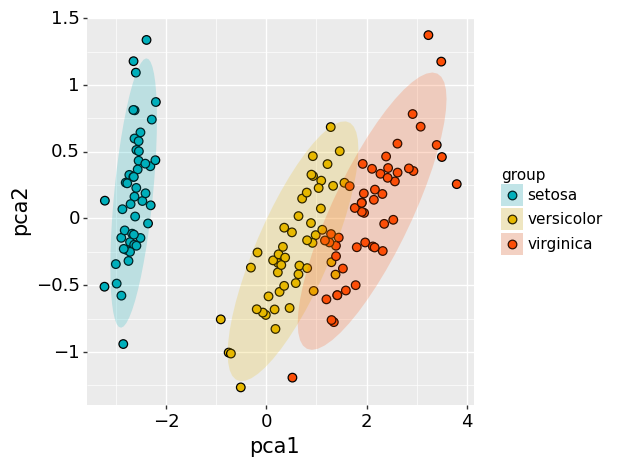

<ggplot: (192277075194)>


In [2]:
base_plot2 = (ggplot(df, aes('pca1', 'pca2', fill='factor(target)')) +
              geom_point(alpha=1, size=3, shape='o', colour='k') +
              # ç»å¶éæåº¦ä¸º0.2 çæ£ç¹å¾
              stat_ellipse(geom="polygon", level=0.95, alpha=0.2) +
              # ç»å¶æ¤­åæ å®ä¸åç±»å«
              scale_fill_manual(values=("#00AFBB", "#E7B800", "#FC4E07"), name='group') +
              theme(
    axis_title=element_text(size=15, face="plain", color="black"),
    axis_text=element_text(size=13, face="plain", color="black"),
    legend_text=element_text(size=11, face="plain", color="black"),
    aspect_ratio=1,
    figure_size=(5, 5),
    dpi=100
)
)
print(base_plot2)


##   (b) 93维数据的train数据集

In [3]:
df = pd.read_csv('Tsne_Data.csv')
df = df.set_index('id')

num_rows_sample = 5000

df = df.sample(n=num_rows_sample)

X_reduced = PCA(n_components=2).fit_transform(df.iloc[:, :-1])

df = pd.DataFrame(
    dict(pca1=X_reduced[:, 0], pca2=X_reduced[:, 1], target=df.iloc[:, -1]))
df


,pca1,pca2,target
id,,,
846,24.002362,-14.448084,Class_1
60850,-0.344479,-2.741521,Class_9
35641,-2.218248,10.447094,Class_6
12083,-3.393735,-1.514022,Class_2
45596,-0.534955,-1.493356,Class_6
...,...,...,...
15695,-3.877077,-1.913098,Class_2
55222,14.350543,-0.515234,Class_8
50570,-0.197305,48.094926,Class_8


C:\QMDownload\anaconda\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_ellipse : Removed 129 rows containing non-finite values.
C:\QMDownload\anaconda\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 129 rows containing missing values.


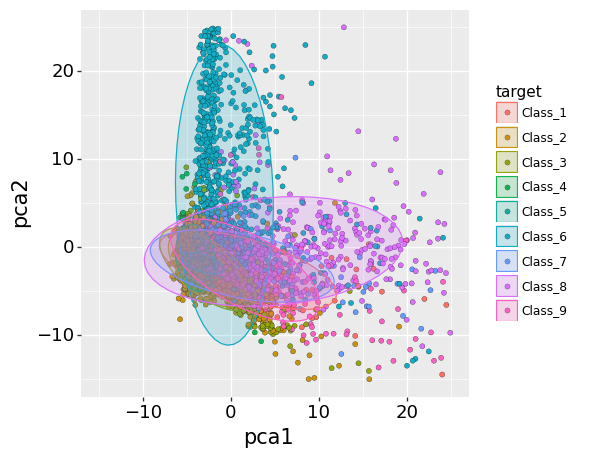

<ggplot: (192277812471)>


In [4]:
base_plot2 = (ggplot(df, aes('pca1', 'pca2', fill='target', color='target')) +
              geom_point(alpha=1, size=2, shape='o', colour='k', stroke=0.1) +
              stat_ellipse(geom="polygon", level=0.95, alpha=0.2) +
              xlim(-15, 25) +
              ylim(-15, 25) +
              scale_fill_hue(s=0.99, l=0.65, h=0.0417, color_space='husl') +
              scale_color_hue(s=0.99, l=0.65, h=0.0417, color_space='husl') +
              theme(
    # text=element_text(size=15,face="plain",color="black"),
    axis_title=element_text(size=15, face="plain", color="black"),
    axis_text=element_text(size=13, face="plain", color="black"),
    aspect_ratio=1,
    figure_size=(5, 5),
    dpi=100
)
)
print(base_plot2)
